In [2]:
import pathlib
import pylab as plt
import os
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib
import seaborn as sns
import sys


In [3]:
sns.set_style('white')

In [4]:
PRJ='PRJNA602160'
BASE_PATH='/Data/Assembly/'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
ALIGNER='minimap2'
SRA_RUN_INFO='HKU4rCoV_SI_SRA_datasets.tsv'
SPOT_RUN_INFO='HKU4rCoV_SI_SRA_datasets_Run_Info.csv'
ACCESSIONS='Accessions_V4.csv'
ITERATION='V4'
PARAMS='default'
N_PCT=10
POSTFIX=f'_x_sr_secondary_no_{PRJ}_SARSr-CoV_MERSr-CoV_no_polyA_fastv_V4_minimap2_gatk_sorted_marked_coverage.out'
#PARAMS='default'

In [127]:
if not os.path.exists(PLOT_PATH):
    os.makedirs(PLOT_PATH)

In [128]:
df_accessions=pd.read_csv(PLOT_PATH+ACCESSIONS)

In [129]:
df_accessions.head(n=2)

,Accession,Short,Description
0,AY278741.1,SARS Urbani,SARS coronavirus Urbani
1,AY390556.1,GZ02,SARS coronavirus GZ02


In [130]:
df_accessions['Accession']=df_accessions['Accession'].str.strip()
df_accessions['Short']=df_accessions['Short'].str.strip()

### datasets

In [131]:
df_spots=pd.read_csv(PLOT_PATH+SPOT_RUN_INFO)

In [132]:
df_spots=df_spots.rename(columns=lambda x: x.strip())
df_spots.rename(columns = {'Run':'SRA'}, inplace = True)
df_spots.head()

,SRA,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,SRR10915149,2020-02-09 12:38:31,2020-01-19 19:21:50,63550036,9532505400,0,150,4081,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,GEO,SRA1028610,NaN,public,C800B06CEA72811C8DC017144B7A1949,65A18C67CB3222ACC2CCF5BC4BF23441
1,SRR10915150,2020-02-09 12:38:31,2020-01-19 19:16:05,70472455,10570868250,0,150,4538,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,GEO,SRA1028610,NaN,public,D3C5622BBFD587A01620B0BB2A576404,A58AE3CB4850D9F754A6CF47AA7A3174
2,SRR10915151,2020-02-09 12:38:31,2020-01-19 19:08:03,47142115,7071317250,0,150,3260,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,GEO,SRA1028610,NaN,public,9C465FE15A16D53943F2A174B286366A,9C277378A8B317C5462C59B20D0526DC
3,SRR10915152,2020-02-09 12:38:31,2020-01-19 19:12:18,47400288,7110043200,0,150,3188,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,GEO,SRA1028610,NaN,public,74A82990955542D834318CB3EE97C995,B92B3F3CC926E7DED0D666D3744EFD75
4,SRR10915153,2020-02-09 12:38:31,2020-01-19 19:15:18,65118456,9767768400,0,150,4178,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,GEO,SRA1028610,NaN,public,A6F094274B43E3F9F7386B4517B1B610,B6EACA5D89D030C992B1059EAFF5E1CA


In [133]:
df_spots.loc[df_spots['SRA'] == 'SRR10915149', 'spots'].iloc[0]

63550036

In [134]:
df_datasets=pd.read_csv(PLOT_PATH+SRA_RUN_INFO, sep='\t')

In [135]:
df_datasets=df_datasets.rename(columns=lambda x: x.strip())

In [136]:
df_datasets.head()

,Run,BioSample,Assay Type,Bases,Bytes,Uncompressed,Experiment,genotype/variation,GEO_Accession,LibrarySelection,LibrarySource,Sample Name,source_name,Tissue,ReleaseDate,LoadDate,spots,bases
0,SRR10915149,SAMN13884669,Bisulfite-Seq,9.53 G,3.99 Gb,24G,SRX7582551,WT,GSM4276680,RANDOM,GENOMIC,GSM4276680,egg,mature egg isolated from ovule,2020-02-09 12:38:31,2020-01-19 19:21:50,63550036,9532505400
1,SRR10915150,SAMN13884668,Bisulfite-Seq,10.57 G,4.43 Gb,26G,SRX7582552,WT,GSM4276681,RANDOM,GENOMIC,GSM4276681,egg,mature egg isolated from ovule,2020-02-09 12:38:31,2020-01-19 19:16:05,70472455,10570868250
2,SRR10915151,SAMN13884667,Bisulfite-Seq,7.07 G,3.18 Gb,18G,SRX7582553,WT,GSM4276682,RANDOM,GENOMIC,GSM4276682,sperm,mature sperm isolated from pollen,2020-02-09 12:38:31,2020-01-19 19:08:03,47142115,7071317250
3,SRR10915152,SAMN13884666,Bisulfite-Seq,7.11 G,3.11 Gb,18G,SRX7582554,WT,GSM4276683,RANDOM,GENOMIC,GSM4276683,sperm,mature sperm isolated from pollen,2020-02-09 12:38:31,2020-01-19 19:12:18,47400288,7110043200
4,SRR10915153,SAMN13884665,Bisulfite-Seq,9.77 G,4.08 Gb,24G,SRX7582555,WT,GSM4276684,RANDOM,GENOMIC,GSM4276684,unicellular zygote,unicellular zygote isolated from ovule at 6.5 ...,2020-02-09 12:38:31,2020-01-19 19:15:18,65118456,9767768400


## Read in CoV alignments

In [137]:
SRAs=['SRR10915149','SRR10915150','SRR10915151','SRR10915152','SRR10915153',\
      'SRR10915154','SRR10915155','SRR10915156','SRR10915157','SRR10915158',\
      'SRR10915159','SRR10915160','SRR10915161','SRR10915162','SRR10915163',\
      'SRR10915164','SRR10915165','SRR10915166','SRR10915167','SRR10915168',\
      'SRR10915169','SRR10915170','SRR10915171','SRR10915172','SRR10915173','SRR10915174']

In [138]:

dfs=[]
for sra in SRAs:
    df=pd.read_csv(DATA_PATH+sra+'/'+ALIGNER+'/'+sra+POSTFIX, sep='\t')
    df['BioProject']=[PRJ]*len(df)
    df['SRA']=[sra]*len(df)
    spots=df_spots.loc[df_spots['SRA'] == sra, 'spots'].iloc[0]
    df['spots']=[spots]*len(df)
    df['spots'] = df['spots'].astype(str).astype(int)
    df['reads_per_M']=df['numreads']/(df['spots']/1000000)
    df=df.rename(columns=lambda x: x.strip())
    dfs.append(df)
df_all= pd.concat(dfs)


In [139]:
df_all.dtypes

#rname          object
startpos         int64
endpos           int64
numreads         int64
covbases         int64
coverage       float64
meandepth      float64
meanbaseq      float64
meanmapq       float64
BioProject      object
SRA             object
spots            int64
reads_per_M    float64
dtype: object

In [140]:
df_all.rename(columns = {'#rname':'Virus'}, inplace = True)

In [141]:
df_all.head()

,Virus,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,BioProject,SRA,spots,reads_per_M
0,CS480537.1,1,8218,5,314,3.820880,0.038209,40.3,13.00,PRJNA602160,SRR10915149,63550036,0.078678
1,NC_001623.1,1,133894,6,317,0.236754,0.002569,38.9,16.50,PRJNA602160,SRR10915149,63550036,0.094414
2,NC_002169.1,1,135611,3073,320,0.235969,0.673942,38.0,1.11,PRJNA602160,SRR10915149,63550036,48.355598
3,NC_007605.1,1,171823,24,123,0.071585,0.006670,25.5,2.17,PRJNA602160,SRR10915149,63550036,0.377655
4,NC_007653.1,1,156487,1888,184,0.117582,0.384652,37.2,1.94,PRJNA602160,SRR10915149,63550036,29.708874


In [142]:
len(list(set(df_all.SRA.tolist())))

26

In [143]:
df_all['numreads'] = df_all['numreads'].astype(int)

In [144]:
s=df_all.loc[(df_all['Virus'] == 'NC_002169.1')]
s['coverage'].max()

0.319296

In [145]:
s=df_all.loc[(df_all['Virus'] == 'NC_001623.1')]
s['coverage'].max()

1.49148

In [146]:
df_all.dtypes

Virus           object
startpos         int64
endpos           int64
numreads         int64
covbases         int64
coverage       float64
meandepth      float64
meanbaseq      float64
meanmapq       float64
BioProject      object
SRA             object
spots            int64
reads_per_M    float64
dtype: object

In [147]:
df_all.shape

(702, 13)

In [148]:
df_temp = df_all.loc[df_all['coverage'] >=N_PCT]
gt_10_asc=list(set(df_temp['Virus'].tolist()))
#add specific back in
#gt_10_asc.append('GX_ZC45r')



In [149]:
df_pivot=df_all.pivot_table(index='SRA', columns='Virus', values='numreads')

#cut to N pct + addtional viruses
df_pivot=df_pivot[df_pivot.columns[df_pivot.columns.isin(gt_10_asc)]]

In [150]:
df_pivot.shape

(26, 9)

Order ~ by host

In [152]:
order_by=df_accessions['Accession'].tolist()
cols=df_pivot.columns.tolist()
reorder_cols=[]
for o in order_by:
    for c in cols:
        if o.strip()==c.strip(): 
            found=True
            reorder_cols.append(c)

In [153]:
len(set(df_pivot.columns))

9

In [154]:
reorder_cols

['HKU4r-HZAU-2020',
 'NC_001702.1',
 'NC_019843.3',
 'NC_029853.1',
 'CS480537.1',
 'AJ289709.1',
 'NC_007647.1',
 'DL231478.1',
 'NC_022518.1']

In [155]:
df_pivot.columns

Index(['AJ289709.1', 'CS480537.1', 'DL231478.1', 'HKU4r-HZAU-2020',
       'NC_001702.1', 'NC_007647.1', 'NC_019843.3', 'NC_022518.1',
       'NC_029853.1'],
      dtype='object', name='Virus')

In [156]:
assert set(reorder_cols) == set(df_pivot.columns)

In [157]:
df_pivot=df_pivot.reindex(columns= reorder_cols)

In [158]:
def remove_specific_cols(df_pivot):
    misc_cov=['NC_009657.1']

    misc_cols_to_del = [col for col in misc_cov if col in df_pivot.columns.values]
    df_pivot=df_pivot.drop(misc_cols_to_del, axis = 1)
    return df_pivot

In [159]:
#df_pivot=remove_specific_cols(df_pivot)

In [160]:
data=df_pivot.to_numpy()

In [161]:
def get_samples(y_labels, df_datasets):
    y_names=[]
    for sra in y_labels:
        y_names.append(df_datasets.loc[df_datasets['Run'] == sra.strip(), 'Run'].values[0])
    return y_names

In [162]:
def get_accessions(x_labels, df_accessions):
    x_codes=[]
    for accession in x_labels:
        x_codes.append(df_accessions.loc[df_accessions['Accession'] == accession.strip(), 'Short'].values[0])
    return x_codes

In [163]:
df_accessions.head(n=100)

,Accession,Short,Description
0,AY278741.1,SARS Urbani,SARS coronavirus Urbani
1,AY390556.1,GZ02,SARS coronavirus GZ02
2,DQ022305.2,HKU3-1,Bat SARS coronavirus HKU3-1
3,DQ084199.1,HKU3-2,bat SARS coronavirus HKU3-2
4,DQ084200.1,HKU3-3,bat SARS coronavirus HKU3-3
...,...,...,...
60,AJ289709.1,HERV-H/env62,Human endogenous retrovirus H HERV-H/env62 pro...
61,NC_007647.1,Oryza sativa endornavirus,"Oryza sativa endornavirus, complete genome"
62,DL231478.1,Raccoon pox,Recombinant raccoon pox viruses and their use ...
63,NC_022518.1,HERV K113,Human endogenous retrovirus K113


In [164]:
df_pivot.head()

Virus,HKU4r-HZAU-2020,NC_001702.1,NC_019843.3,NC_029853.1,CS480537.1,AJ289709.1,NC_007647.1,DL231478.1,NC_022518.1
SRA,,,,,,,,,
SRR10915149,0,0,0,0,5,116,0,59,18
SRR10915150,0,0,0,0,2,103,0,72,24
SRR10915151,0,0,0,0,11,646,0,292,51
SRR10915152,0,0,0,0,14,692,0,298,61
SRR10915153,0,0,0,0,1,58,0,47,23


In [165]:
x_labels=list(df_pivot.columns.values)
x_codes=get_accessions(x_labels, df_accessions)

In [166]:

y_labels=df_pivot.index.tolist()
y_names=get_samples(y_labels, df_datasets)

### Plot Counts

In [167]:
data=df_pivot.to_numpy()
plot_data = np.ma.masked_equal(data[:,:], 0)

In [168]:
#GX_ZC45_CoV_SRAs=['HB-FJ-NA-7','MJ-ZJ-MO-2','MP-ZJ-MO-4','MJ-ZJ-MO-1','MJ-ZJ-MO-3','HB-HuB-N-3','RP-JX-A-2','HB-FJ-NA-3','MC-HuN-T-1','HB-HuB-A-1','ML-HeB-F-1','MJ-ZJ-MO-6','MJ-ZJ-MO-4','HB-HuB-A-2','MC-HeB-T-1','PL-AH-MO-5']

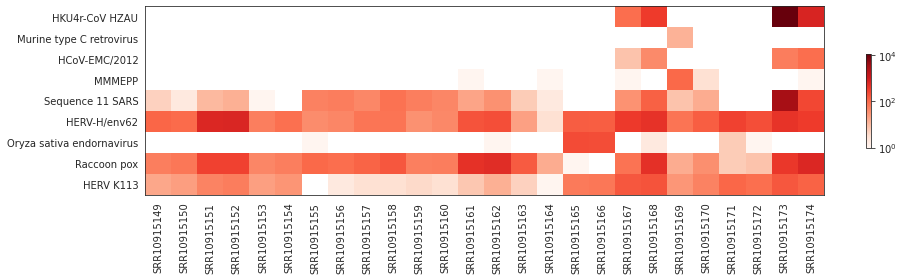

In [169]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,4))
img=ax.imshow(plot_data.T, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", \
              aspect='auto',norm=matplotlib.colors.LogNorm())
#transposed so swap x and y
ax.set_xticks(list(range(len(y_names))))
ax.set_xticklabels(y_names,rotation=90)
ax.set_yticks(list(range(len(x_codes))))
ax.set_yticklabels(x_codes)

fig.colorbar(img, shrink=0.5)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"{ALIGNER}_{PARAMS}_{POSTFIX}_{N_PCT}_N_rot.png", bbox_inches='tight')

## Coverage

In [170]:
df_all.head()

,Virus,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,BioProject,SRA,spots,reads_per_M
0,CS480537.1,1,8218,5,314,3.820880,0.038209,40.3,13.00,PRJNA602160,SRR10915149,63550036,0.078678
1,NC_001623.1,1,133894,6,317,0.236754,0.002569,38.9,16.50,PRJNA602160,SRR10915149,63550036,0.094414
2,NC_002169.1,1,135611,3073,320,0.235969,0.673942,38.0,1.11,PRJNA602160,SRR10915149,63550036,48.355598
3,NC_007605.1,1,171823,24,123,0.071585,0.006670,25.5,2.17,PRJNA602160,SRR10915149,63550036,0.377655
4,NC_007653.1,1,156487,1888,184,0.117582,0.384652,37.2,1.94,PRJNA602160,SRR10915149,63550036,29.708874


In [171]:
df_accessions.head()

,Accession,Short,Description
0,AY278741.1,SARS Urbani,SARS coronavirus Urbani
1,AY390556.1,GZ02,SARS coronavirus GZ02
2,DQ022305.2,HKU3-1,Bat SARS coronavirus HKU3-1
3,DQ084199.1,HKU3-2,bat SARS coronavirus HKU3-2
4,DQ084200.1,HKU3-3,bat SARS coronavirus HKU3-3


In [172]:
df_cov=df_all.pivot(index='SRA', columns='Virus', values='coverage')

#cut to N pct + addtional viruses
df_cov=df_cov[df_cov.columns[df_cov.columns.isin(gt_10_asc)]]

order_by=df_accessions['Accession'].tolist()


In [173]:
cols=df_cov.columns.tolist()
reorder_cols=[]
for o in order_by:
    for c in cols:
        if o.strip()==c.strip(): 
            reorder_cols.append(c)
assert len(cols)==len(reorder_cols)
df_cov=df_cov.reindex(columns= reorder_cols)

In [174]:
df_cov=remove_specific_cols(df_cov)
data_cov=df_cov.to_numpy()
plot_data_cov = np.ma.masked_equal(data_cov[:,:], 0)

In [175]:
x_labels=list(df_cov.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
y_labels=df_cov.index.tolist()
y_names=get_samples(y_labels, df_datasets)

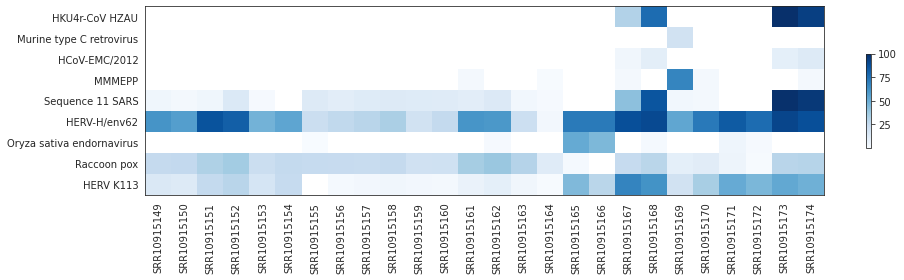

In [176]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,4))
img=ax.imshow(plot_data_cov.T, cmap=plt.cm.get_cmap("Blues"), interpolation="nearest", aspect='auto')
#transposed
ax.set_xticks(list(range(len(y_names))))
ax.set_xticklabels(y_names,rotation=90)
ax.set_yticks(list(range(len(x_codes))))
ax.set_yticklabels(x_codes)

fig.colorbar(img, shrink=0.5)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"{ALIGNER}_{PARAMS}_{POSTFIX}_{N_PCT}_coverage_rot.png", bbox_inches='tight')

In [353]:
df_corr.head()

Virus,DQ249214.1,DQ249216.1,DQ648794.1,EF065505.1,HKU4r-HZAU-2020,KJ473822.1,KU143693.1,MN611519.1,NC_001499.1,NC_001500.1,NC_001503.1,NC_001653.2,NC_001702.1,NC_001802.1,NC_007815.2,NC_009019.1,NC_019843.3,NC_029853.1,NC_031450.1
SRA,,,,,,,,,,,,,,,,,,,
SRR10915149,0.0,0.0,0.0,0.0,0.0,0.0,4.217149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR10915150,0.0,0.0,0.0,0.0,0.0,0.0,3.802904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR10915151,0.0,0.0,0.0,0.0,0.0,0.0,5.133414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR10915152,0.0,0.0,0.0,0.0,0.0,0.0,4.620225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR10915153,0.0,0.0,0.0,0.0,0.0,0.0,3.762374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Correlation

In [354]:
df_norm=df_corr.copy()

In [355]:
df_norm_0=df_norm.fillna(0)

In [356]:
df_norm_HKU4 = df_norm[df_norm['HKU4r-HZAU-2020'] > 0]

In [357]:
df_norm_HKU4.shape

(4, 19)

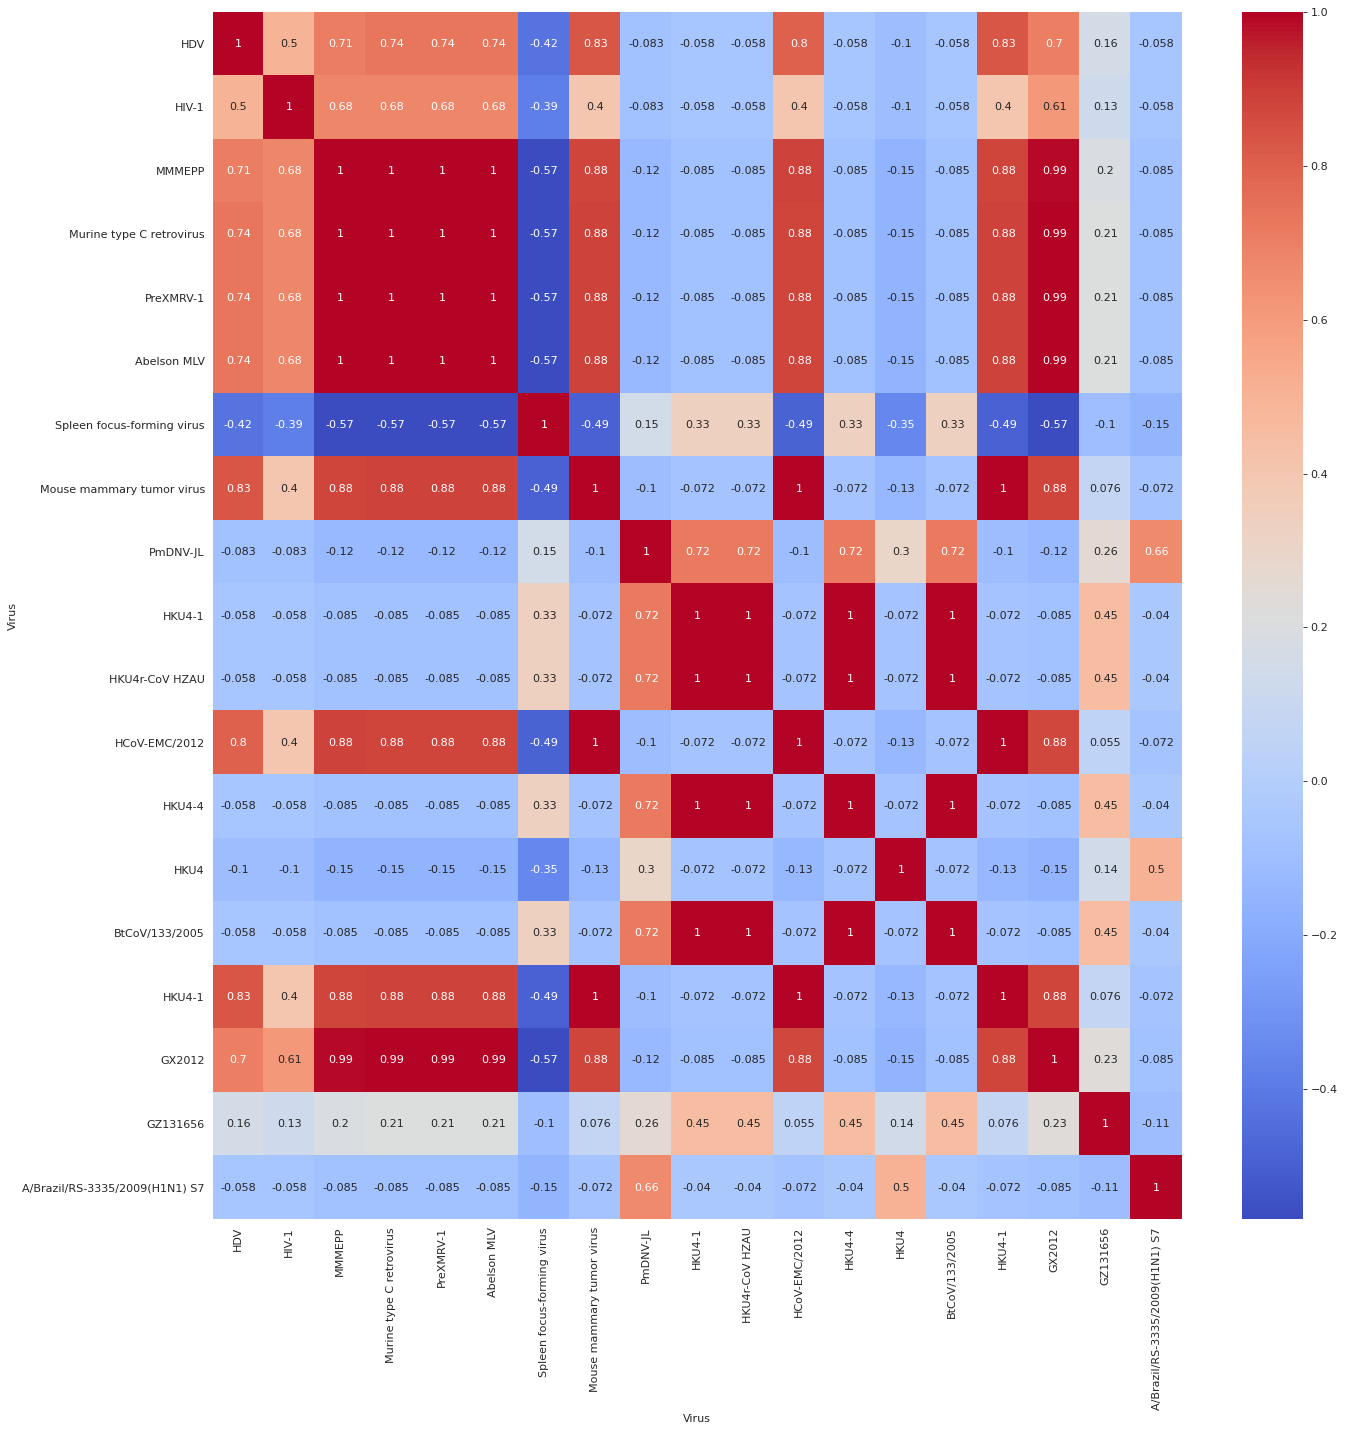

In [358]:
corr_method='spearman'
fig, ax = plt.subplots(1,1, figsize=(18, 18), dpi= 80)
#sns.set(rc={"figure.figsize":(19, 19)})
sns_plot=sns.heatmap(df_norm_0.corr(method=corr_method),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()

#ax.set_xticks(list(range(len(x_codes))))
xlabels=ax.set_xticklabels(x_codes, rotation=90)
for i, xlabel in enumerate(xlabels):
    xlabel.set_x(xlabel.get_position()[0] +50)
#ax.set_yticks(list(range(len(x_codes))))
ylabels=ax.set_yticklabels(x_codes)
for i, ylabel in enumerate(ylabels):
    ylabel.set_y(ylabel.get_position()[1] -50)

#ax.tick_params(which='major', labelrotation=90)
fig.tight_layout()
fig.savefig(PLOT_PATH+f"viruses_norm_{PARAMS}_{corr_method}_correlation.png")

### Bacteria/HKU4 correlation

In [20]:
df_bac=pd.read_csv(PLOT_PATH+'STAT.csv')

In [38]:
df_bac.head(n=26)

,Sample title,SRA,Bacteria,Homo sapiens,HKU4r-HZAU-2020 viral genome only,Fastp passed,HKU4r percentage
0,BS-seq of WT egg replicate 1,SRR10915149,33.53%,0.02%,0,59219979,0.000000
1,BS-seq of WT egg replicate 2,SRR10915150,32.09%,0.02%,0,64799669,0.000000
2,BS-seq of WT sperm replicate 1,SRR10915151,11.78%,0.11%,0,42515590,0.000000
3,BS-seq of WT sperm replicate 2,SRR10915152,14.09%,0.11%,0,43383826,0.000000
4,BS-seq of WT zygote replicate 1,SRR10915153,33.82%,0.02%,0,60645059,0.000000
5,BS-seq of WT zygote replicate 2,SRR10915154,34.12%,0.02%,0,65485885,0.000000
6,BS-seq of dng702 egg replicate 1,SRR10915155,18.37%,0.01%,0,43723167,0.000000
7,BS-seq of dng702 egg replicate 2,SRR10915156,20.01%,0.01%,0,52651586,0.000000
8,BS-seq of dng702 sperm replicate 1,SRR10915157,14.60%,0.01%,0,41018588,0.000000
9,BS-seq of dng702 sperm replicate 2,SRR10915158,12.47%,0.01%,0,45602041,0.000000


In [22]:
df_bac_rnaseq=df_bac[df_bac['Sample title'].str.contains("RNA")]

In [23]:
df_bac_rnaseq=df_bac_rnaseq.drop(columns=['Sample title', 'Homo sapiens', 'HKU4r-HZAU-2020 viral genome only','Fastp passed'])

In [26]:
df_bac_rnaseq['Bacteria'] = df_bac_rnaseq['Bacteria'].str.rstrip('%').astype('float') 

In [27]:
df_bac_rnaseq=df_bac_rnaseq.set_index('SRA')

In [29]:
df_bac_rnaseq=df_bac_rnaseq.rename(columns={"HKU4r percentage": "HKU4r-HZAU-2020"})

In [30]:
df_bac_rnaseq.head()

,Bacteria,HKU4r-HZAU-2020
SRA,,
SRR10915165,4.03,0.000000
SRR10915166,2.67,0.000000
SRR10915167,83.41,0.001214
SRR10915168,40.98,0.001280
SRR10915169,0.14,0.000000


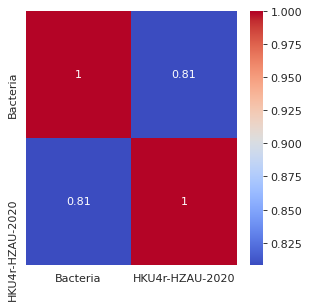

In [36]:
corr_method='spearman'
fig, ax = plt.subplots(1,1, figsize=(4, 4), dpi= 80)
sns_plot=sns.heatmap(df_bac_rnaseq.corr(method=corr_method),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()

fig.tight_layout()
fig.savefig(PLOT_PATH+f"RNAseq_bacteria-HKU4r-CoV_{corr_method}_correlation.png")